# PH509: Lab 1 Assignment

In [ ]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

##Problem 1 :

For Radioactive decay, Differential equation is given as:
$$
\frac{dN(t)}{dt} = -\frac{N(t)}{\tau}
$$
we will use Euler's method. To Solve this differential equation we have assumed values: time constant $\tau$ and $N(0)$

In [ ]:
#constants
tau = 1.0     # sec
n0 = 100      # Boundary condition

# define the array for the independent variable 0 < t < 5
dt = tau/100
t = np.arange(0., 10.+dt, dt)

# define the discrete n(t) array
nt = np.zeros( len(t) )

# incorporate the boundary condition
nt[0] = n0

Euler step

$$ N(t + \Delta t) = N(t) + \frac{dN(t)}{dt}\Bigr|_t \Delta t
$$
$$
N(t + \Delta t) = N(t) - \frac{N(t)}{\tau}\Bigr|_t \Delta t
$$

since we are advancing time in steps of $\Delta t$, therefore the above recursion relation is:
$$ N(k) = N(k-1) - \frac{N(k-1)}{\tau}dt $$

In [ ]:
for k in range(1, len(t)):
  nt[k] = nt[k-1] - (nt[k-1]/tau)*dt

In [ ]:
delta_nt = abs(nt - n0*np.exp(-t/tau))

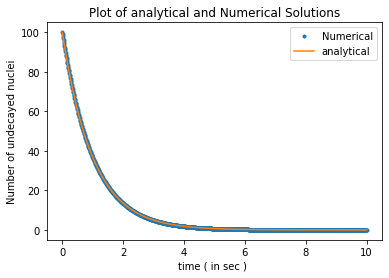

In [ ]:
plt.figure( figsize = (6, 4) )
plt.plot(t, nt, '.', label = 'Numerical')
plt.plot(t, n0*np.exp(-t/tau), '-', label = 'analytical')
plt.xlabel('time ( in sec ) ')
plt.ylabel('Number of undecayed nuclei')
plt.title('Plot of analytical and Numerical Solutions')
plt.legend()
plt.show()

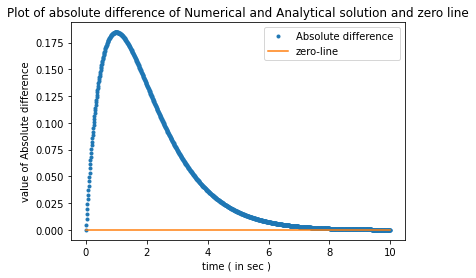

In [ ]:
plt.figure( figsize = (6, 4) )
plt.plot(t, delta_nt, '.', label = 'Absolute difference ')
plt.plot(t, np.zeros( len(t) ), '-', label = 'zero-line')
plt.xlabel('time ( in sec ) ')
plt.ylabel('value of Absolute difference')
plt.title('Plot of absolute difference of Numerical and Analytical solution and zero line')
plt.legend()
plt.show()

Observation: As time increases, The absolute difference between the Numerical and Analytical Solution first increases with time and reaches extremum and then starts decreasing and later on concides with the zero-line, that is to say, after very long time Analytical Solutions and Numerical Solutions are same. So, Late-time charateristics of Numerical solution is very close to precise comparatively to the rest of time-range. \\

The Difference between the Analytical Solutions and Numerical Solutions emerges from the fact that Taylor series for Analytical solutions is evaluated upto infinite terms. But, on the other hand, the Numerical Methods and Solutions, such as Euler Method, is approximated to some degree and, many times, is truncated to finite terms due to computation limitations.

Let's evaluate the Euler's Method numerically and, Compare it with analytical solutions:
Let's say that we have divided our time range in $dt$ steps, starting from zero. \\
Initially, the both solutions coincide as the initial condition, say, $N(t=0)$, same for both cases.
For our problem, we know the analytical solution:
$$ N(t) = N(0) \exp(\frac{-t}{\tau}) $$
$\Rightarrow$
$$ \boxed {N(t) = N(0) \sum_{r=0}^{\infty}(-1)^r\frac{t^r}{r!\tau^r}}$$
**Numerically**: Using Euler's Method \\
we have: we are advancing in $dt$ time step from $t = 0$
$$N(dt) = N(0) - \frac{N(0)}{\tau}dt$$
$$N(2dt) = N(dt) - \frac{N(dt)}{\tau}dt$$
$\Rightarrow$ $$N(2dt) = N(0) - 2 \frac{N(0)}{\tau}dt + \frac{N(0)}{\tau^2}dt^2$$
similarly,
for, $N(3dt)$
$$N(3dt) = N(0) - 3 \frac{N(0)}{\tau}dt + 3 \frac{N(0)}{\tau^2}dt^2 - \frac{N(0)}{\tau^3}dt^3$$

and for, $N(ndt)$
$$N(ndt) = N(0) - \binom{n}{1} \frac{N(0)}{\tau}dt + \binom{n}{2} \frac{N(0)}{\tau^2}dt^2 - \binom{n}{3} \frac{N(0)}{\tau^3}dt^3 + \cdot\cdot\cdot + (-1)^n\binom{n}{n} \frac{N(0)}{\tau^n}dt^n $$
$\Rightarrow$
$$\boxed{N(ndt) = N(0)\sum_{r=0}^{n}(-1)^r \binom{n}{r} \frac{dt^n}{\tau^n} }$$

for very large $n$, Our Numerical Solution is very close to our analytical Solution. and hence, evidently we can see how difference arises and to what values of parameters in our Numerical Method, it converges to our Analytical Method.

# Problem 2 :

The velocity of a freely falling object near the Earth’s surface is described by the
equation $$dv/dt = g$$ where , $$g = 9.8 m/s^2$$ is the acceleration due to gravity.

**Part (a) & (b) :**

The analytic solution for the given differential equation with the given boundary conditions is $$ v(t) = v(0) + g t $$ where,  $v(0) = 0 $ (initial boundary condition). \
The below code contains the following steps (marked by the comment numbers in the code ) :

(1) A function **funt(dt)** is defined which would depend on the values of the time-step $dt$.

(2) The values of the constants used in problem is defined.

(3) The array of independent variable $(t)$ is defined which has the values of time ,$0 < t < 10$ $secs $.

(4) The array for velocity (numerical solution) is defined along with the boundary condition.

(5)The array for the exact velocity ( analytic solution) is defined along with the boundary condition.

(6)  **Euler Step** :

 $$v(t + \Delta t ) = v(t) + \frac{dv}{dt}|_t  \Delta t $$

$$v(t + \Delta t ) = v(t) + g   \Delta t $$

Since we are advancing in the steps of $\Delta t$, therefore the above recursion relation is   :

$$ v(k+1) = v(k) +   g \Delta t $$

or equivalently ,

$$ v(k) = v(k-1) + g \Delta t $$

(7) The array for containing the  difference between the numerical solution and the analytical solution is defined. \

$$\Delta v(t) = v(t)_{num} - v(t)_{exact}$$

(8) Now the return command will return me the arrays for $t$ , $v(t)_{num}$ , $v(t)_{exact} $ and $\Delta v(t)$.

In [ ]:
# (1) Defining the function depending on the time-step dt.

def funt(dt) :

  g = 9.8    #m/sec^2                       # (2) Defining the constants in the problems
  v0 = 0    #boundary condition

  #(3) Defining the array for the independent vaiable
  t = np.arange( 0. , 10 +dt , dt )        # sec

  #(4) Defining the array for the velocity (numerical solution)
  vt = np.zeros(len(t))                   # m/sec
  vt[0] = v0

  #(5)  Defining the array for the velocity (analytical solution)
  ve = np.zeros(len(t))                # m/sec
  ve[0] = v0

  #(6) Euler steps :
  for k in range(1 , len(t)) :
    vt[k] = vt[k-1] + (g*dt)
    ve[k] = (g*(t[k]))

  #(7)  The array for containing the  difference between the numerical solution and the analytical solution is defined.
  del_vt = np.zeros(len(t))            # m/sec
  del_vt = vt - ve

  return t , vt , ve , del_vt          #(8) The return command is used for the arrays of required variables.

Defining a function $pl1$ depending on values of $dt , t , v_t ,v_e $   for plotting the graph between the Numerical solution and the analytical solution.

In [ ]:
def pl1( dt , t , vt , ve ) :
  plt.figure(num = 1 , figsize = (6,4))
  plt.plot( t , vt , color ='r' , label = 'numerical' , linewidth = 5 )
  plt.plot( t , ve , color ='blue' , label = 'analytical' )
  plt.title( " Graph for velocity(v) vs. time(t) for dt = " +str(dt))
  plt.xlabel('time (sec)')
  plt.ylabel('velocity (m/sec)')
  plt.legend()
  plt.show()

Defining a function $pl2$ depending on values of $dt, t , \Delta v(t) $   for plotting the graph for showing the difference between the Numerical solution and the analytical solution.

In [ ]:
def pl2( dt , t , del_vt) :
  plt.figure( num = 2 , figsize = (6 , 4))
  plt.plot( t , del_vt , label = 'difference b/w numerical & analytic soln for dt =' +str(dt))
  plt.xlabel("time")
  plt.ylabel('difference b/w num & analytic')
  plt.legend()
  plt.show()

Putting  $dt$ = 0.001 , 0.01 ,0.1 ; consecutively and calling the functions that were defined above for the arrays of required variables and for their corresponding plots and getting the required plots as asked in the question :

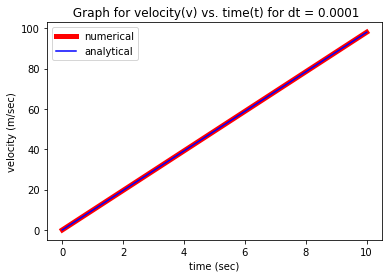

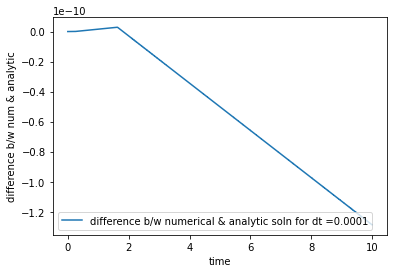

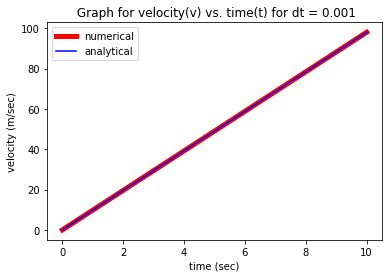

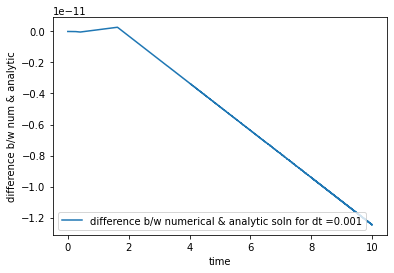

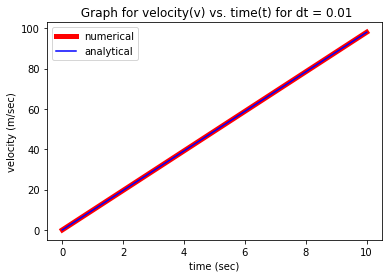

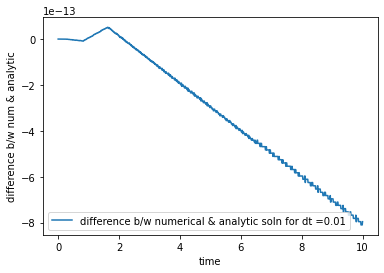

In [ ]:
for j in [0.0001 , 0.001 , 0.01] :       ##time-steps(dt)
  x = funt(j)
  pl1(j , x[0] , x[1] , x[2] )
  pl2( j , x[0] , x[3])

From the above plots for Difference between Numerical and Analytical solutions we conclude the following points :

  (1) The difference obtained between Numerical and Analytical solutions for the different values of $dt$ (time-step) is in the order of $ 10^{-10} ,  10^{-11}$ and  $10^{-13} $ for $dt = 0.0001$ $sec$ , $dt = 0.001$ $sec$ and $dt = 0.01$ $sec$ respectively.\
  So, Euler Method (First Order) gives almost the exact solution for the given problem.

  (2) Thus the error propagation in the Euler Method is only due to the propagation of error in the time-step $\Delta t$ as the second term in the R.H.S of the below equation of Euler Step .

   $v(t + \Delta t ) = v(t) + g  \Delta t $

   does not depend on the $v(t)$ but on $g$ and $\Delta t$ , and since $g$ is a constant the only source of error propagation is through that in  $\Delta t$ and which gives the difference between numerical and analytical solution in the orders of $ 10^{-10} ,  10^{-11}$ and  $10^{-13} $ for $dt = 0.0001$ $sec$ , $dt = 0.001$ $sec$ and $dt = 0.01$ $sec$ respectively. This is the reason for the Euler Method to give the exact solution to the given problem.

# Problem 3 :
  The velocity of the object obeys the Differential Equation of the form :
  $$\frac{dv}{dt} = g - \alpha v$$  where, $$g = 9.8 m/s^2 $$ is the acceleration due to gravity and $\alpha$ is the frictional drag coefficient.

**Part (a) :** \
   The frictional drag coefficient $\alpha$ is used to quantify the drag or the resistance during the motion of an object moving in a steady fluid flow ( eg. air , as is given here). So the sign of $\alpha$ is positive which ensures that the velocity of the object decreases as it moves through the air because the Drag force acts in the direction opposite to the motion of the object.\
   The differential equation   $$\frac{dv}{dt} = g - \alpha v$$  describes that the drag force acts in the opposite direction of the motion of the object ( Here as the object moves downwards , the drag force acts upwards ) and hence implies the sign of $\alpha$ to be Positive.

**Part (b) :** The velocity of the object obeys the Differential Equation of the form :
  $$\frac{dv}{dt} = g - \alpha v$$

  At $t = 0$ , the initial velocity $v(t = 0) = 0$ (boundary condition).\
  We will use the first order Euler's method to solve this equation.

As the object falls down the Drag force acts in the direction opposite to its motion i.e in the upward direction. The object keeps accelerating in the downward direction until the force of gravity and the drag force acting on the object become equal and hence achieves a constant velocity termed as the terminal velocity ($v_{ter}$). \
Thus we have for terminal velocity ,
$$\frac{dv}{dt} = g - \alpha v_{ter} = 0 $$
So , $v_{ter} = g/\alpha$   
The given Differential Equation $$\frac{dv}{dt} = g - \alpha v$$ can be reduced to $$\frac{dv}{dt} = - \alpha (v - v_{ter})$$

In [ ]:
## -- constants
g = 9.8     # m/sec^2
vt0 = 0.    # m/sec

The analytic solution for the given differential equation with the given boundary conditions is $$ v(t) = v_{ter} ( 1 - e^{-\alpha t } )$$ where,  $v_{ter} = g/\alpha $ \
The below code contains the following steps (marked by the comment numbers in the code ) :

(1) A function **fun(alpha)** is defined which would depend on the values of $\alpha$

(2) A variable for terminal velocity is defined.

(3) The total time interval (T) is defined in such a way that it would depend in the value of the drag coefficient ($\alpha$).\
     Method :  $v(t)$ would approach $v_{ter}$ for $t \rightarrow \infty$ as the $e^{-\alpha t }$ would tend to zero in this condition.\
     So , $e^{-\alpha t }$ has been assumed to be $10^{-8}$, which is almost equal to zero , then  $e^{-\alpha T } = 10^{-8} $\
     $\therefore \alpha T = \ln(10^{8})$\
     $\therefore T = \frac{8 \ln{10}}{\alpha} \approx \frac{18}{\alpha}$

(4) Then the time-step is defined depending on the value of $T$.

(5) The array of independent variable (t) is defined.

(6) The array for velocity (numerical solution) is defined along with the boundary condition.

(7)The array for the exact velocity ( analytic solution) is defined along with the boundary condition.

(8)  **Euler Step :**

$v(t + \Delta t ) = v(t) + \frac{dv}{dt}\Bigr|_t    \Delta t $

$v(t + \Delta t ) = v(t) -  \alpha (v - v_{ter}) \Delta t $

Since we are advancing in the steps of $\Delta t$, therefore the above recursion relation is   :

$ v(k+1) = v(k) -   \alpha (v - v_{ter})  \Delta t $

or equivalently ,

$ v(k) = v(k-1) -   \alpha (v - v_{ter}) \times  \Delta t $

(9) Now the return command will return me the arrays for $t$ , $v(t)$ and $v(exact) $.


In [ ]:
#(1)Defining the function :

def fun(alpha) :
  vtr = g/alpha                      #(2) terminal velocity ( m/sec^2)

  #(3) Below time is calculated such that it is the time for the object to reach its terminal velocity)

  T = 18.0/alpha                     # sec
  dt = T/100                         # (4) time-step (sec) is defined

  #(5) Defining the array for the independent variable ( 0 < t < T)
  t = np.arange( 0. , T +dt , dt)

  #(6) Defining the discrete v(t) array
  vt = np.zeros(len(t))
  vt[0] = vt0                        # boundary condition

  #(7) Defining the array for exact(analytical soln) ve = v(exact)
  ve = np.zeros(len(t))
  ve[0] = 0.                         # boundary condition

  #(8) Performing the first order Euler method
  for k in range( 1 , len(t)) :
    vt[k] = vt[k-1] - ((alpha * (vt[k-1] - vtr)) * dt)
    ve[k] = vtr * ( 1 - np.exp(-t[k] * alpha ))
  return t , vt , ve                 # (9)the return command is used for the necessary arrays.

Defining a function $pt$ depending on values of $\alpha , t , v_t ,v_e $   for plotting the graph between the Numerical solution and the analytical solution.

In [ ]:
def pt( alpha , t , vt , ve ) :
  plt.figure(num = 1 , figsize = (6,4))
  plt.plot( t , vt , color ='r' , label = 'numerical' , linewidth = 5 )
  plt.plot( t , ve , color ='blue' , label = 'analytical' )
  plt.title( r' Graph for velocity(v) vs. time(t) for $\alpha$ = ' +str(alpha))
  plt.xlabel('time (sec)')
  plt.ylabel('velocity (m/sec)')
  plt.legend()
  plt.show()

Putting  $\alpha$ = 1.0 , 1.5 ,2.0 ; consecutively and calling the functions that were defined above for the arrays of required variables and for their corresponding plots and getting the required plots as asked in the question :

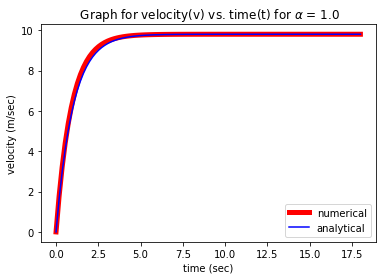

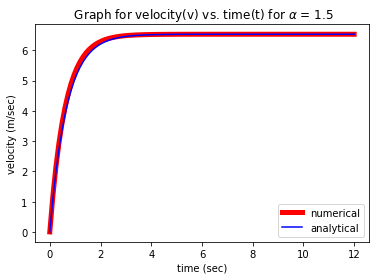

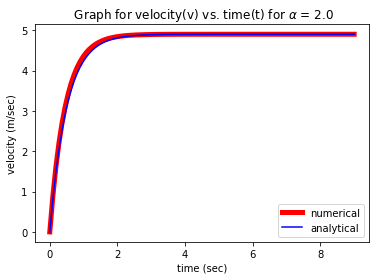

In [ ]:
for j in [ 1.0 , 1.5 , 2.0] :       ## values of alpha(drag coefficient)
  x = fun(j)
  pt( j , x[0] , x[1] ,x[2] )

**Part (c) :**

It can be clearly observed from the above obtained graphs that the velocity of the object $v$ starts out from 0 and approaches a terminal velocity , $v \rightarrow v_{ter}$ , asymptotically as $t \rightarrow \infty$ . \

Now , the analytical solution $$ v(t) = v_{ter} ( 1 - e^{-\alpha t } )$$  shows that at , $t = 1/\alpha $ , we have $v(t) = v_{ter} ( 1 - e^{-1} ) \approx 0.63 v_{ter} $ .


So, let us define $\tau = 1/\alpha$ ,then we can use $\tau$ as a typical time-scale in the given problem. So, 'long-time' in the given problem would be quantified w.r.t $\tau$ and hence the time comparably higher than $\tau$ can be considered as long-time interval in the given problem.

**Part (d) :**

Consider the differential equation given : $$\frac{dv}{dt} = - \alpha (v - v_{ter})$$ Now , we have defined the time-scale using $\tau = 1/\alpha $ ,then the above equation takes the form ;  
$$\frac{dv}{dt}=\frac{-1}{\tau} (v - v_{ter})$$ so to adimensionalize the given differential equation , we consider $\tau$ as the time scale and $v_{ter}$ as the velocity scale for the given problem , so now  let's assume two new variables .

$\tilde{v} = \frac{v - v_{ter}}{v_{ter}}$ and $\tilde{t} = \frac{t}{\tau}$ , and hence the above differential equation reduces to  $$\frac{d\tilde{v}}{d\tilde{t}}= -\tilde{v}$$


In [ ]:
##Defining the Total time interval for the problem assuming the drag coefficient to be 1
T1 = 18.0         ## secs
##defining the array for the independent variable ( 0 < t < 18 )
dt1 = T1/ 1000     ## secs (time steps)
t1 = np.arange( 0. , T1 +dt1 , dt1 )

## defining the discrete ~v(t) array
vt1 = np.zeros(len(t1))

## incorporating the boundary condition
vt1[0] = -1

**Euler Step**

$\tilde{v}(\tilde{t} + \Delta \tilde{t} ) = \tilde{v}(\tilde{t}) + \frac{d\tilde{v}}{d\tilde{t}}|_\tilde{t}    \Delta \tilde {t} $

$\tilde{v}(\tilde{t} + \Delta \tilde{t} ) = \tilde{v}(\tilde{t}) - \tilde{v}(\tilde{t})   \Delta \tilde {t} $


Since we are advancing in the steps of $\Delta\tilde{t}$, therefore the above recursion relation is   :

$\tilde{v}(k + 1 ) = \tilde{v}(k) - \tilde{v}(k)   \Delta \tilde {t} $


or equivalently ,

$\tilde{v}(k  ) = \tilde{v}(k-1) - \tilde{v}(k-1)   \Delta \tilde {t} $

In [ ]:
for i in range( 1 , len(t1)) :
    vt1[i] = vt1[i-1] -(vt1[i-1] * dt1)

Plotting the graph between $\tilde{v}(\tilde{t})$ vs $\tilde{t} $ :

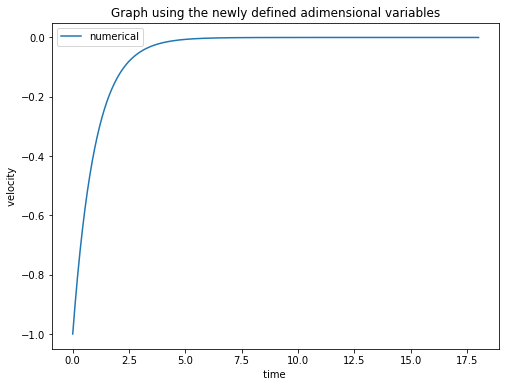

In [ ]:
plt.figure(num = 1 , figsize = (8,6))
plt.plot( t1 , vt1 , label = 'numerical' )
plt.title("Graph using the newly defined adimensional variables")
plt.xlabel( ' time  ')
plt.ylabel( ' velocity ')
plt.legend()
plt.show()

From the above plot it can be deduced that the new dimensionless variable $\tilde{v} \rightarrow 0$ which depends on the terminal velocity $v_{ter}$  ; takes a long time (w.r.t. to $\tau$) for the velocity $v(t)$ to reach  $v_{ter}$ and the time it takes is $t \rightarrow \infty$ or we can say, as the time reaches the values comparable (higher) to $\tau$, the velocity $v(t)$ tends to $v_{ter}$ and hence $\tilde{v}(\tilde{t}) \rightarrow 0$ as is observed in the above plot.

###Problem 4 :

Radioactive decay involving two types of nuclei - A and B with populations $N_A(t)$ and $N_B(t)$. Also, Nuclei-A decay to form Nuclei-B. The chained decay is associated with the coupled  differential equation: \\
$$\frac{dN_A(t)}{dt} = \frac{-N_A(t)}{\tau_A}$$
$$\frac{dN_B(t)}{dt} = \frac{N_A(t)}{\tau_A}-\frac{N_B(t)}{\tau_B}$$

To Solve these coupled differential decay equations numerically and analytically, we have assumed values of time constants $\tau_A$ and $\tau_B$ and values of Boundary conditions: $N_A(t = 0)$ and $N_B(t=0)$

In [ ]:
# constants
tauA = 1.0    #sec
tauB = 2.6    #sec

# Boundary Conditions
n0A = 100
n0B = 2

# define the array for the independent variable 0 < t < 5
dt = tauA/100      # taking whichever mean life time is shorter, here, tauA
t = np.arange(0., 5.+dt, dt)

# define the discrete arrays: n1(t) and n2(t)
ntA = np.zeros( len(t) )
ntB = np.zeros( len(t) )

# incorporate the Boundary conditions
ntA[0] = n0A
ntB[0] = n0B

To Solve these equations numerically we have used Euler's method:
considering time step $\Delta t$, we have Euler's steps as: \\
$$ N_A(t + \Delta t) = N_A(t) + \frac{dN_A(t)}{dt}\Bigr|_t \Delta t $$
$$ N_B(t + \Delta t) = N_B(t) + \frac{dN_B(t)}{dt}\Bigr|_t \Delta t $$ \\
$\Rightarrow$ $$ N_A(t + \Delta t) = N_A(t) - \frac{N_A(t)}{\tau_A} \Delta t $$
$$ N_B(t + \Delta t) = N_B(t) + \left( \frac{N_A(t)}{\tau_A}-\frac{N_B(t)}{\tau_B} \right) \Delta t $$ \\
we get the following recursion relations:
$\Rightarrow$ $$ N_A(k) = N_A(k-1) - \frac{N_A(k-1)}{\tau_A} \Delta t $$
$$ N_B(k) = N_B(k-1) + \left( \frac{N_A(k-1)}{\tau_A}-\frac{N_B(k-1)}{\tau_B} \right) \Delta t $$

In [ ]:
# Euler's Method:
for k in range(1, len(t)):
  ntA[k] = ntA[k-1] - (ntA[k-1]/tauA)*dt
  ntB[k] = ntB[k-1] + ((ntA[k-1]/tauA)-(ntB[k-1]/tauB))*dt

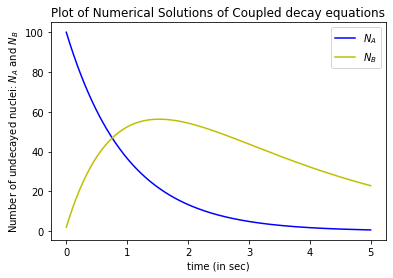

In [ ]:
# Plot for Numerical Solutions
plt.figure(num = 1, figsize = (6, 4))
plt.plot(t, ntA, 'b-', label = '$N_A$')
plt.plot(t, ntB, 'y-', label = '$N_B$')
plt.xlabel('time (in sec)')
plt.ylabel('Number of undecayed nuclei: $N_A$ and $N_B$')
plt.title('Plot of Numerical Solutions of Coupled decay equations' )
plt.legend()
plt.show()

To Solving these equation analytically we use Matrix method to solve coupled Differential equations:
$$\frac{dN_A(t)}{dt} = \frac{-N_A(t)}{\tau_A}$$
$$\frac{dN_B(t)}{dt} = \frac{N_A(t)}{\tau_A}-\frac{N_B(t)}{\tau_B}$$ \\
$\Rightarrow$
\begin{equation}
\frac{d}{dt}
\begin{pmatrix}
N_A(t) \\
N_B(t) \\
\end{pmatrix}
=
\begin{pmatrix}
\frac{-1}{\tau_A} & 0 \\
\frac{1}{\tau_A} & \frac{-1}{\tau_B} \\
\end{pmatrix}
\begin{pmatrix}
N_A(t) \\
N_B(t) \\
\end{pmatrix}
\end{equation}


As the Matrix associated with Differential Equations is a lower triangular matrix, eigenvalues of this matrix are the diagonal elements, that is, $\frac{-1}{\tau_A}$ and $\frac{-1}{\tau_B}$ and corresponding eigenvectors are:
\begin{equation}
\begin{pmatrix}
\frac{\tau_A}{\tau_B}-1 \\
 1 \\
\end{pmatrix}
and
\begin{pmatrix}
0 \\
1 \\
\end{pmatrix}
\end{equation}
respectively. \\
after calculating, we find solutions as,
$$N_A(t) = N_A(0) \exp(\frac{-t}{\tau_A})$$
$$N_B(t) = \alpha \exp(\frac{-t}{\tau_A}) + \beta \exp(\frac{-t}{\tau_B}) $$
where \\
$\alpha = \frac{N_A(0)}{\frac{\tau_A}{\tau_B}-1}$ and $\beta = N_B(0) - \frac{N_A(0)}{\frac{\tau_A}{\tau_B}-1}$


In [ ]:
#Analytical

# Values of constants Alpha and Beta:
alph = n0A/((tauA/tauB) - 1)          # alpha
beta = n0B - (n0A/((tauA/tauB) - 1))  # beta

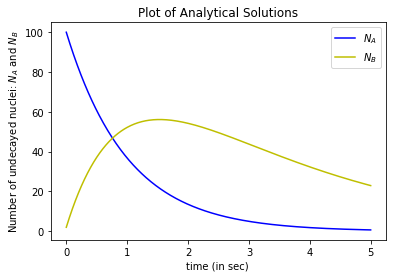

In [ ]:
# Plot of Analytical Solutions obtained:
plt.figure(num = 2, figsize = (6, 4))
plt.plot(t, n0A*np.exp(-t/tauA), 'b-', label = '$N_A$')
plt.plot(t, alph*np.exp(-t/tauA) + beta*np.exp(-t/tauB), 'y-', label = '$N_B$')
plt.xlabel('time (in sec) ')
plt.ylabel('Number of undecayed nuclei: $N_A$ and $N_B$')
plt.title('Plot of Analytical Solutions')
plt.legend()
plt.show()

Comparing Numerical Solutions with Analytical Solutions.   

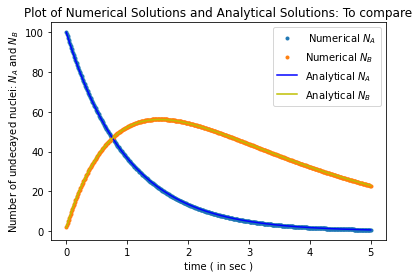

In [ ]:
# Plotting Numerical Solutions and Analytical Solutions together to compare
plt.figure(num = 3, figsize = (6, 4))
plt.plot(t, ntA, '.', label = ' Numerical $N_A$ ')
plt.plot(t, ntB, '.', label = 'Numerical $N_B$ ')
plt.plot(t, n0A*np.exp(-t/tauA), 'b-', label = 'Analytical $N_A$ ')
plt.plot(t, alph*np.exp(-t/tauA) + beta*np.exp(-t/tauB), 'y-', label = 'Analytical $N_B$ ')
plt.xlabel(' time ( in sec ) ')
plt.ylabel('Number of undecayed nuclei: $N_A$ and $N_B$')
plt.title('Plot of Numerical Solutions and Analytical Solutions: To compare')
plt.legend()
plt.show()

To compare them even better we find absolute difference between values of Numerical Solutions and Analytical Solution and Also Plot the "Zero-line" to see how much this difference is close to zero.

In [ ]:
# Absolute Difference between Numerical Solutions and Analytical Solutions
delt_ntA = abs(ntA - n0A*np.exp(-t/tauA))                             # difference in N_A
delt_ntB = abs(ntB - (alph*np.exp(-t/tauA) + beta*np.exp(-t/tauB)))   # difference in N_B

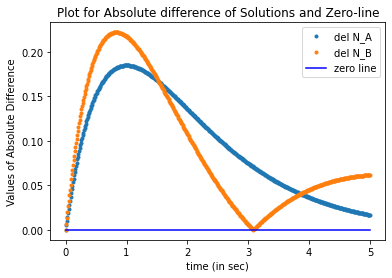

In [ ]:
# Plot of Absolute Difference of Solutions and zero-line
plt.figure(num = 4, figsize = (6, 4))
plt.plot(t, delt_ntA, '.', label = 'del N_A')                          # difference in N_A
plt.plot(t, delt_ntB, '.', label = 'del N_B')                          # difference in N_B
plt.plot(t, np.zeros( len(t) ), 'b-', label = 'zero line')             # for zero-line
plt.xlabel(' time (in sec) ')
plt.ylabel(' Values of Absolute Difference ')
plt.title( 'Plot for Absolute difference of Solutions and Zero-line' )
plt.legend()
plt.show()

Solutions of radioactive decay Coupled differential Equations for different Values of $\frac{\tau_A}{\tau_B}$ and their behaviour.

In order to get solutions for different values of $\tau_A$ and $\tau_B$. We define a function with parameters $\tau_A$ and $\tau_B$. We choose values of time constants such that we get Solutions for when $\frac{\tau_A}{\tau_B} < 1$, $\frac{\tau_A}{\tau_B} = 1$, $\frac{\tau_A}{\tau_B} \approx 1$ and $\frac{\tau_A}{\tau_B} > 1$

In [ ]:
# for Different value of tauA/tauB

In [ ]:
#Defining function with parameters tauA, tauB
def func(tauA, tauB) :

  # Boundary condition
  n0A = 100
  n0B = 2

  # define the array for the independent variable 0 < t < 5
  dt = tauA/1000
  t = np.arange(0., 10.+dt, dt)

  # define the discrete arrays: n1(t) and n2(t)
  ntA = np.zeros( len(t) )
  ntB = np.zeros( len(t) )

  # incorporate the Boundary conditions
  ntA[0] = n0A
  ntB[0] = n0B

  # Euler's Method
  for k in range(1, len(t)):
    ntA[k] = ntA[k-1] - (ntA[k-1]/tauA)*dt
    ntB[k] = ntB[k-1] + ((ntA[k-1]/tauA)-(ntB[k-1]/tauB))*dt

  # Plot
  plt.figure( figsize = (6, 4) )
  plt.plot(t, ntA, 'b-', label = '$N_A$')
  plt.plot(t, ntB, 'y-', label = '$N_B$')
  plt.xlabel('time (in sec) ')
  plt.ylabel('Number of undecayed nuclei: $N_A$ and $N_B$')
  plt.title(r'Plot for $\tau_A$ =' + str(tauA) + r' $\ $ and $\tau_B$ =' + str(tauB))
  plt.legend()
  plt.show()

  return t, ntA, ntB

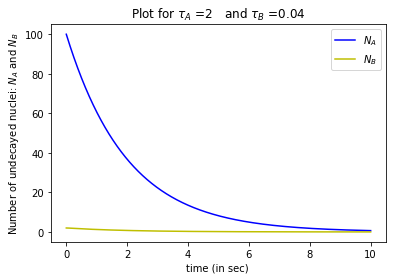

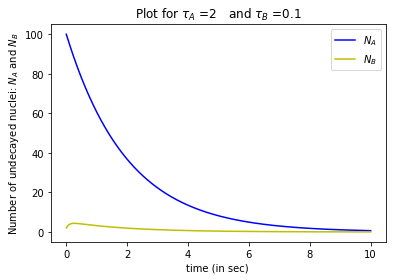

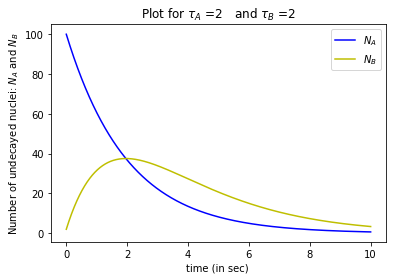

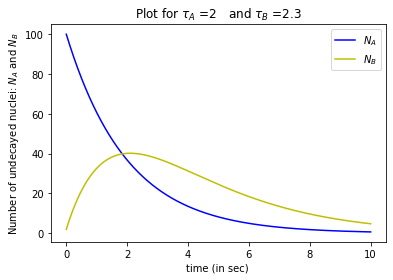

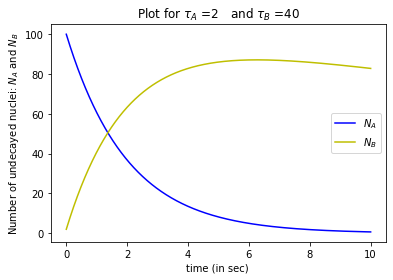

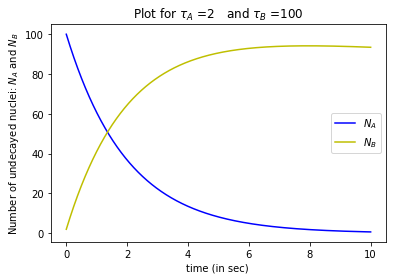

In [ ]:
tauA = 2
for tauB in [0.04, 0.1, 2, 2.3, 40, 100] :
  func(tauA, tauB)

We have taken $\tau_A$ to be fixed and changed $\tau_B$ such that we have values of different ratio of $\frac{\tau_A}{\tau_B}$.
Time constant $\tau_A$ and $\tau_B$ will decide how fast population of nuclei will grow and decay. Greater the value of $\tau$, higher will be the rate of growth and decay, depending upon the sign to which it is proportion to.
Since rate of decay of Nuclei A is proportional to negative of $N_A$ and $\tau_A$. in all cases, It will decay exponentially.
the rate of decay of Nuclei B is proportional to positive of $N_A$ and $\tau_A$, and is proportional to negative of $N_A$ and $\tau_B$. So, both $(N_A, \tau _A)$ and $(N_B,\tau_B)$ will play role for growth and decay respectively.

Observation: \\

for $\frac{\tau_A}{\tau_B} > 1$: Nuclei A decays exponentially with time. Nuclei B, for short time start to increase, but reaches optimum somewhat instantaneously depending upon how much greater the raio is and starts decaying and subsequently decays out. \\

for $\frac{\tau_A}{\tau_B} = 1 $: Nuclei A decays exponentially with time. Nuclei B, increases for quite some time and after reaching optimum, subsequently, starts decaying and, in long time, it also decays out.  \\

for $\frac{\tau_A}{\tau_B} \approx 1$: Same as above case. \\

for $\frac{\tau_A}{\tau_B} < 1$: Nuclei A decays exponentially with time. Nuclei B increases and reaches saturation.